## 《合成孔径雷达成像——算法与实现》中5.6 点目标示例  零斜视角情况

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [2]:
from numpy import sin,cos,sinc,arctan,angle,pi,abs,ceil,sqrt,exp
# from numpy.fft import fft,fft2
from scipy.fft import fft,fft2
from numpy import savetxt

## 场景设置
# 雷达设置
C = 3e8;                                                                    # 光速
f0 = 5.3e9;                                                                 # 雷达工作频率
lambda0 = C/f0;                                                              # 工作波长
La = 3.3;
theta = 0;                                                                  # 波束斜视角
theta = theta/180*pi;
# 平台设置                           
V = 150;                                                                    # 雷达有效速度
Rc = 20e3;                                                                  # 景中心斜距
R0 = Rc*cos(theta);                                                         # 最短斜距
# 距离向设置
Tr = 25e-6;                                                                 # 发射脉冲时宽
Kr = 0.25e12;                                                               # 距离调频率
Br = Kr*Tr;
alphaR = 1.2;                                                               # 距离向过采样率
Fr = alphaR*Br;                                                             # 距离向采样频率
dtau = 1/Fr;                                                                # 距离向采样时间间隔
Nr = 256;                                                                   # 距离线数
# 方位向设置
Bdop = 0.886*2*V*cos(theta)/La;                                             # 多普勒带宽
alphaA = 1.3;                                                               # 方位向过采样率
Fa = alphaA*Bdop;                                                           # 方位向采样频率
deta = 1/Fa;                                                                # 方位向采样时间间隔
Na = 256;                                                                   # 方位线数
fc = 2*V*sin(theta)/lambda0;                                                 # 多普勒中心频率
thetaBW = 0.886*lambda0/La;                                                  # 方位向波束宽度

## 点目标设置
Ntarget = 1;
Ptarget = np.array([[R0,0]]);                                                           # 距离向坐标，方位向坐标

## 时间轴、频率轴设置
tau = (np.linspace(-Nr/2,Nr/2-1,Nr)*dtau+2*Rc/C).reshape((1,Nr));                                # 距离向时间轴
#tau = (np.linspace(-Nr/2,Nr/2-1,Nr)).reshape((1,Nr));                                # 距离向时间轴
eta = (np.linspace(-Na/2,Na/2-1,Na)*deta).reshape((1,Na));                                       # 方位向时间轴
# print( Nr)
# print( dtau )
# print( 2*Rc/C )
# print( tau[0,99])
tau_m = np.ones((Na,1))*tau;                                                     # 距离向时间轴矩阵
eta_m = eta.transpose()*np.ones((1,Nr));                                                    # 方位向时间轴矩阵
print(tau_m.shape)
print(eta_m.shape)
# savetxt("tau.txt",tau_m,delimiter=',')
# savetxt("eta.txt",eta_m,delimiter=',')
## 生成回波信号矩阵
S0 = np.zeros((Na,Nr));
for k in range(Ntarget):
    R = sqrt(Ptarget[k,0]**2+(V*eta_m-Ptarget[k,0]*np.tan(theta)-Ptarget[k,1])**2);         # 点目标斜距矩阵
    print( R[99,99],R[100,100],R[101,101])
    savetxt("R.txt",np.real(R),delimiter=',')
    Wr = np.where(abs(tau_m-2*R/C)<Tr/2,1,0);                                                         # 矩形窗矩阵
    Wa = sinc(0.886*arctan((V*eta_m-Ptarget[k,1])/Ptarget[k,0])/thetaBW)**2;              # 双程波束方向图 P91(4.27) (4.28)
    savetxt("Wa.txt",np.real(Wa),delimiter=',')
    S0 = S0+Wr*Wa*exp(-1j*4*pi*f0*R/C)*exp(1j*pi*Kr*(tau_m-2*R/C)**2);   # 生成回波信号矩阵 P156 (6.1)
    savetxt("S0.txt",np.real(S0),delimiter=',')
savetxt("S0.txt",np.abs(S0),delimiter=',')
Srd = fft(S0,axis=0);
savetxt("Srd.txt",np.abs(Srd),delimiter=',')
Sff = fft2(Srd);


(256, 256)
(256, 256)
20000.043146867996 20000.04022252911 20000.037400798203


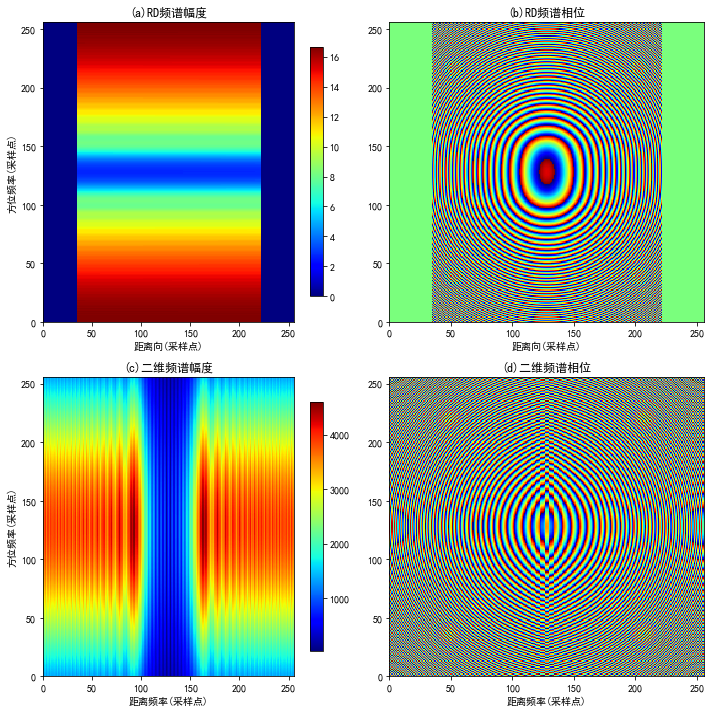

In [3]:
# 绘图
from matplotlib.pyplot import figure,subplot,plot,axis,title,xlabel,ylabel,text,arrow

# 绘图      
figure(figsize=(10,10));

subplot(221)
plt.pcolor(abs(Srd),cmap='jet')
plt.colorbar(shrink = .83)
# colorbar,set(gca, 'YDir', 'normal')              
xlabel('距离向(采样点)');ylabel('方位频率(采样点)');title('(a)RD频谱幅度');
subplot(222)
plt.pcolor(angle(Srd),cmap='jet')
# set(gca, 'YDir', 'normal')
xlabel('距离向(采样点)');title('(b)RD频谱相位');
#  距离频域-方位频域                  
subplot(223)
plt.pcolor(abs(Sff),cmap='jet')
plt.colorbar(shrink = .83)
# set(gca, 'YDir', 'normal')               
xlabel('距离频率(采样点)');ylabel('方位频率(采样点)');title('(c)二维频谱幅度');
subplot(224)
plt.pcolor(angle(Sff),cmap='jet')
# set(gca, 'YDir', 'normal')
xlabel('距离频率(采样点)');title('(d)二维频谱相位');

plt.tight_layout()